In [4]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

X = wine.drop(['color'], axis = 1) # feature
y = wine['color'] # label

# color에 따라 와인을 구별할 것으로 feature 데이터 에서는 color 컬럼을 삭제하고 label 데이터에서는 color 컬럼만 지정해준다

### Pipeline : 데이터 수집, 전처리, 모델학습, 학습 모델 배포, 예측 등 머신러닝의 전체 과정을 순차적으로 한 과정에 처리하는 일련의 프로세스
- 코드를 하나씩 실행해보면서 머신러닝을 진행하다보면 혼돈이 발생할 수 있다
- 데이터의 전처리와 여러 알고리즘의 반복 실행, 하이퍼 파라미터의 튜닝 과정을 번갈아 하다보면
- 코드의 싱행 순성에 혼선 발생 가능
- 상기 사항들을 극복하기 위하여 한 과정에 처리하는 sklearn의 Pipeline 사용
- 여기선 StandardScaler를 적용하여 DecisionTree까지 한번에 만드는 방법

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scalar', StandardScaler()),
    ('clf', DecisionTreeClassifier())
]

pipe = Pipeline(estimators)

In [6]:
pipe

Pipeline(steps=[('scalar', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

### pipeline.steps

In [8]:
pipe.steps
# 0번째는 StandardScaler() 진행할 것이며 scalar로 지정되었다
# 1번째는 DecisionTreeClassifier() 진행할 것이며 StandardScaler() 지정되었다

[('scalar', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [10]:
pipe.steps[0]

('scalar', StandardScaler())

In [11]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

### 스탭별로 객체 호출(각 기능을 각각 호출해서 사용 가능)

In [12]:
pipe[0]

StandardScaler()

In [13]:
pipe['scalar']

StandardScaler()

In [20]:
pipe[1]

DecisionTreeClassifier(max_depth=2, random_state=13)

In [21]:
pipe['clf']

DecisionTreeClassifier(max_depth=2, random_state=13)

### 각 스탭별 속성 지정
- .set_params('스탭이름' + _ _(언더바 2개) + 속성설정)

In [17]:
pipe.set_params(clf__max_depth = 2)
pipe.set_params(clf__random_state = 13)

Pipeline(steps=[('scalar', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

### pipeline을 이용한 결정나무 훈련 및 학습 결과

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, 
                     random_state =  13, stratify=y)
                                        # stratify= : 나눈 데이터에 속성 값들을 동일한 비율로 맞춰주는 설정

pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [19]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.9657494708485664
Test ACC :  0.9576923076923077


[Text(0.5, 0.8333333333333334, 'chlorides <= 0.159\ngini = 0.371\nsamples = 5197\nvalue = [3918, 1279]'),
 Text(0.25, 0.5, 'total sulfur dioxide <= -1.149\ngini = 0.07\nsamples = 3786\nvalue = [3649, 137]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.4\nsamples = 141\nvalue = [39, 102]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.019\nsamples = 3645\nvalue = [3610, 35]'),
 Text(0.75, 0.5, 'total sulfur dioxide <= -0.037\ngini = 0.309\nsamples = 1411\nvalue = [269, 1142]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.08\nsamples = 1132\nvalue = [47, 1085]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.325\nsamples = 279\nvalue = [222, 57]')]

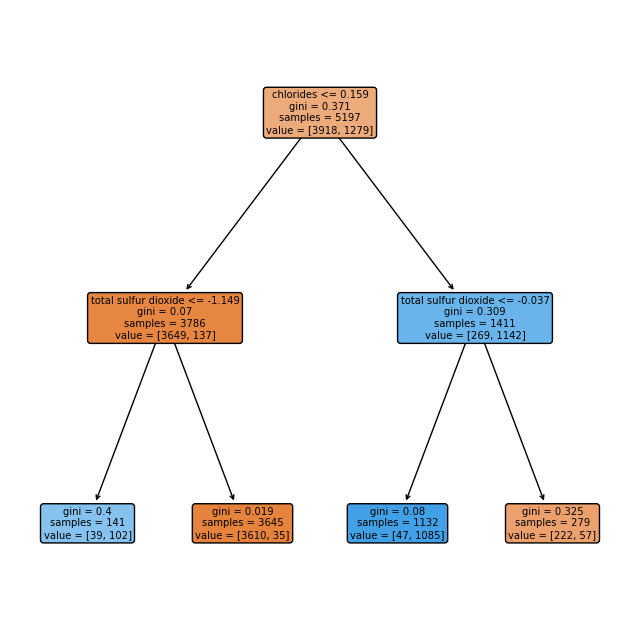

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 8))
feature_names_list= X.columns.tolist()
plot_tree(pipe['clf'], feature_names=feature_names_list,
               rounded=True, filled=True)